In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import pytz

import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
import ipywidgets as widgets
from sklearn.metrics import recall_score
from ipywidgets import interact

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [142]:
df = pd.read_csv("C:/Users/HP/Documents/DATASETS/bankruptcy/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [54]:
df.shape

(6819, 96)

In [55]:
# df.set_index("Bankrupt?", inplace=True)

In [56]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


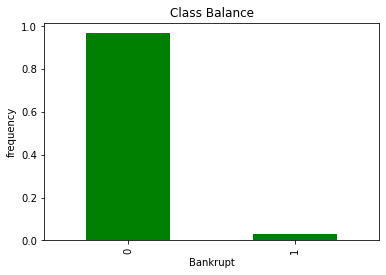

In [57]:
# Plot class balance
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind="bar",
    color="green",
    xlabel="Bankrupt",
    ylabel="frequency",
    title="Class Balance"
);

In [59]:
list(df.columns.values)

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

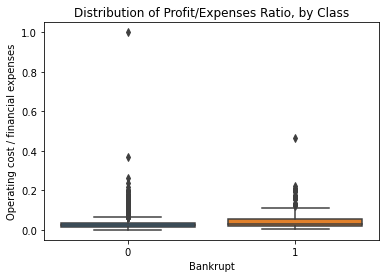

In [67]:
# Create boxplot
sns.boxplot(x="Bankrupt?", y=' Total expense/Assets', data=df)
plt.xlabel("Bankrupt")
plt.ylabel("Operating cost / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class"); 

In [78]:
# Summary statistics for `feat_27`
df[' Total Asset Growth Rate'].describe()


count    6.819000e+03
mean     5.508097e+09
std      2.897718e+09
min      0.000000e+00
25%      4.860000e+09
50%      6.400000e+09
75%      7.390000e+09
max      9.990000e+09
Name:  Total Asset Growth Rate, dtype: float64

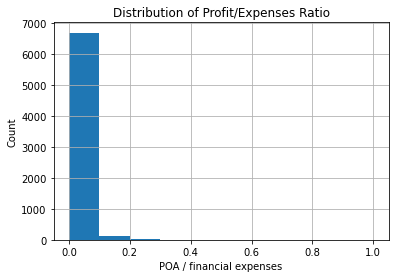

In [80]:
# Plot histogram of `feat_27`
df[' Total expense/Assets'].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

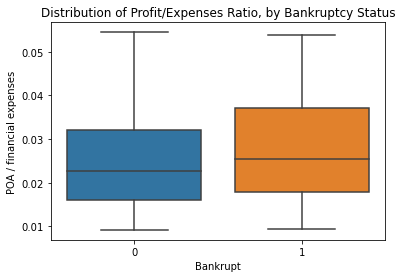

In [81]:
# Create clipped boxplot
q1,q9 = df[' Total expense/Assets'].quantile([0.1, 0.9])
mask = df[' Total expense/Assets'].between(q1, q9)
sns.boxplot(x="Bankrupt?", y=' Total expense/Assets', data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

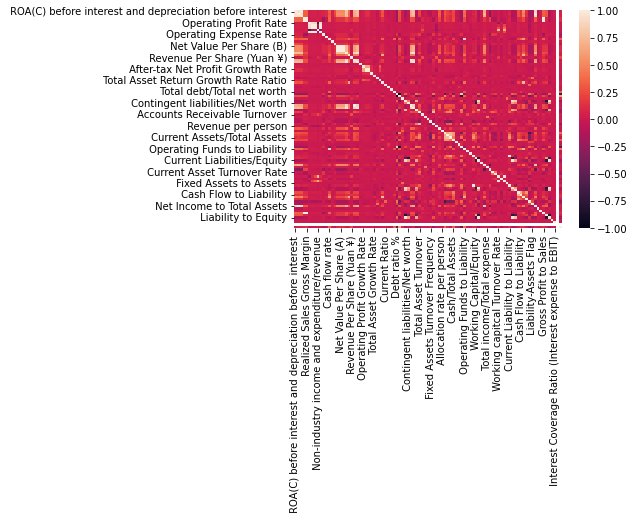

In [82]:
corr = df.drop(columns="Bankrupt?").corr()
sns.heatmap(corr);

Split

In [83]:
target = "Bankrupt?"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [87]:
#Random under sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(338, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
1,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
2,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
3,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


In [88]:
# Random Over-sampling for our imbalanced data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


Build Model

In [89]:
#Baseline Accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


In [90]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [91]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9531
Training Accuracy: 0.813
Test Accuracy: 0.8057
Training Accuracy: 1.0
Test Accuracy: 0.9604


"Good" accuracy ratings don't reveal anything about how well the model performs with unbalanced input. Let's examine how the model predicted the two classes in the dataset rather than what it got right or incorrect.

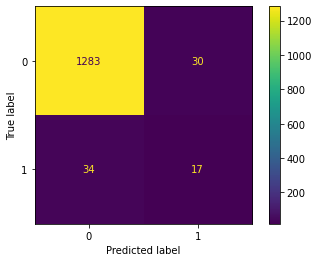

In [92]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

In [93]:
# Determine the depth of the decision tree in model_over
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

53


In [94]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_


In [95]:
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

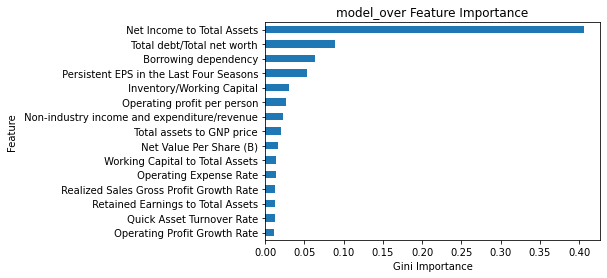

In [96]:
# most important features
# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [100]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [101]:
# cross-validation with my classifier, using the over-sampled training data
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99338061 0.99432624 0.99432356 0.99668874 0.99432356]


In [102]:
# dictionary with the range of hyperparameters that I want to use to evaluate for my classifier
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)    
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [103]:
# GridSearchCV named model that includes my classifier and hyperparameter grid
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [104]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [106]:
# Extracting the cross-validation results from model and loading them into a DataFrame named cv_results
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.764415,0.094693,0.082775,0.014213,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,21
1,3.010485,0.230983,0.069223,0.024814,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,21
2,4.792111,0.175449,0.088992,0.030487,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,19
3,4.621130,0.199018,0.072775,0.006508,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,19
4,5.980130,0.174440,0.091272,0.007243,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,23


In [107]:
# Create a mask for cv_results for rows where "param_randomforestclassifier__max_depth" equals 10
mask = cv_results["param_randomforestclassifier__max_depth"] == 10

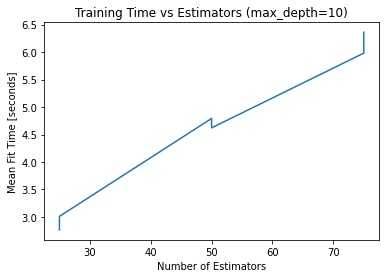

In [108]:
# Plot mean-fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [109]:
# Creating a mask for cv_results for rows where "param_randomforestclassifier__n_estimators" equals 25
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25

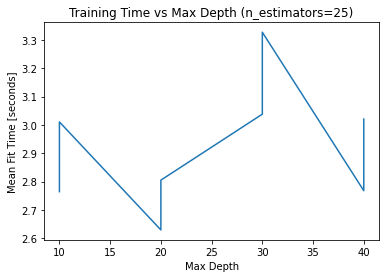

In [110]:
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)

plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

Although there is a general increasing tendency, there is a lot of ups and downs in this area. This is because grid search tests the mean and median imputation procedures for each max depth. 

In [111]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [112]:
model.best_score_ 

0.99498692718363

Evaluating the model

In [115]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9663


In [116]:
y_test.value_counts()

0    1313
1      51
Name: Bankrupt?, dtype: int64

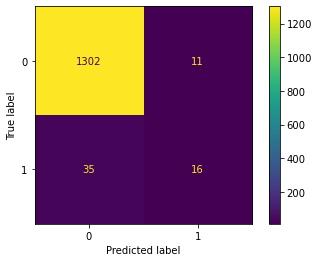

In [117]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

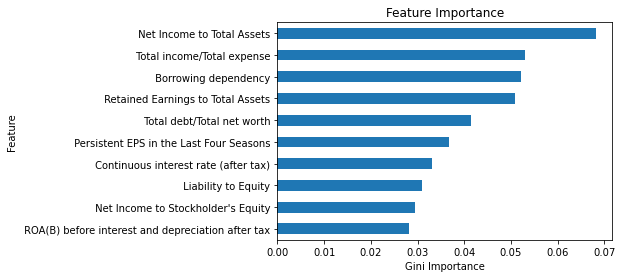

In [118]:
# Horizontal bar chart with the 10 most important features for my model

# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [119]:
# Save model
with open("model-randforcl-bankruptcy", "wb") as f:
    pickle.dump(model, f)

In [121]:
# pipeline named clf (short for "classifier") that contains a SimpleImputer transformer and a GradientBoostingClassifier predictor

In [126]:
clf = make_pipeline(SimpleImputer(), GradientBoostingClassifier())
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])


In [127]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "gradientboostingclassifier__n_estimators": range(20, 31, 5),
    "gradientboostingclassifier__max_depth": range(2, 5)    
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [128]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [129]:
# Fit model to over-sampled training data
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [130]:
# Extracting the cross-validation results from model and loading them into a DataFrame named cv_results
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,16.722432,1.367676,0.019189,0.005151,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.962648,0.965012,0.964522,0.966887,0.971618,0.966137,0.003055,1
16,18.077252,0.113442,0.021189,0.000400,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.962648,0.965012,0.964049,0.966887,0.971618,0.966043,0.003110,2
15,14.981624,0.347961,0.022987,0.005511,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.961229,0.962175,0.962157,0.964995,0.969726,0.964056,0.003104,3
14,15.365804,0.089219,0.025785,0.010641,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.961229,0.962648,0.962157,0.964995,0.968780,0.963962,0.002710,4
12,11.530799,0.211205,0.024786,0.006993,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.956974,0.960284,0.957900,0.960738,0.967360,0.960651,0.003640,5


In [131]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

Evaluate

In [133]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9487
Validation Accuracy: 0.9267


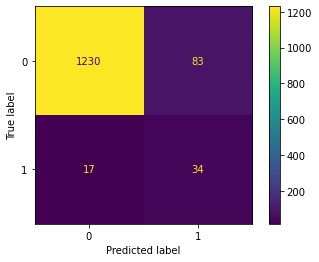

In [144]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [150]:
# Print classification report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1313
           1       0.29      0.67      0.40        51

    accuracy                           0.93      1364
   macro avg       0.64      0.80      0.68      1364
weighted avg       0.96      0.93      0.94      1364



In [148]:
recall = recall_score(y_train, model.predict(X_train))

print(f"Training Set Recall is {round(recall, 2)}")

Training Set Recall is 0.99
